### NLP Assignment - Problem Statement - 6

## Group No - 26

## Group Member Names:
1. Sunil Mittal (BITS ID : 2021SC04968)
2. Vikram Panwar (BITS ID : 2021SC04958)
3. Indira Saha (BITS ID : 2021sc04956)


In [92]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Importing All the required Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk import Tree
from nltk.chunk import ne_chunk
from nltk.grammar import PCFG
from nltk.parse import ViterbiParser
#from nltk.grammar import toy_pcfg1 # toy_pcfg1 is one such parse tree created on dummy data.
#from nltk.grammar import toy_pcfg2
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#### Read the CSV file

In [95]:
# Read the CSV file into a DataFrame
file_path = 'chennai_reviews.csv'
df = pd.read_csv(file_path)

#### Describe the Data set head

In [96]:
# Display the first few rows (head) of the DataFrame
df_head = df.head()
df_head

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


#### No. of rows, columns, and attributes. Plot the graph for the sentiment column

In [97]:
# Get the number of rows and columns
num_rows, num_columns = df.shape
# Get the column names (attributes)
column_names = df.columns.tolist()
print ("No of Rows : " ,  num_rows)
print ("No of Cols :" , num_columns) 
print("List of Columns :" , column_names)

No of Rows :  4768
No of Cols : 9
List of Columns : ['Hotel_name', 'Review_Title', 'Review_Text', 'Sentiment', 'Rating_Percentage', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [98]:
df.describe()

,Unnamed: 5,Unnamed: 7,Unnamed: 8
count,64.000000,1.0,1.0
mean,71.187500,2.0,60.0
std,21.138902,NaN,NaN
min,3.000000,2.0,60.0
25%,59.250000,2.0,60.0
50%,71.000000,2.0,60.0
75%,86.000000,2.0,60.0
max,100.000000,2.0,60.0


In [99]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hotel_name         4768 non-null   object 
 1   Review_Title       4341 non-null   object 
 2   Review_Text        4767 non-null   object 
 3   Sentiment          4766 non-null   object 
 4   Rating_Percentage  4767 non-null   object 
 5   Unnamed: 5         64 non-null     float64
 6   Unnamed: 6         3 non-null      object 
 7   Unnamed: 7         1 non-null      float64
 8   Unnamed: 8         1 non-null      float64
dtypes: float64(3), object(6)
memory usage: 335.4+ KB


In [100]:
missing_val_df = pd.DataFrame().from_records([{'Column Name':col, 
                                               'Missing Values': len(df[df[col].isna()]), 
                                               'Missing Values (%)':np.round(len(df[df[col].isna()])/len(df), 4)*100}
                                              for col in df.columns])
print('Missing values :')
missing_val_df

Missing values :


,Column Name,Missing Values,Missing Values (%)
0,Hotel_name,0,0.00
1,Review_Title,427,8.96
2,Review_Text,1,0.02
3,Sentiment,2,0.04
4,Rating_Percentage,1,0.02
5,Unnamed: 5,4704,98.66
6,Unnamed: 6,4765,99.94
7,Unnamed: 7,4767,99.98
8,Unnamed: 8,4767,99.98


#### Plotting the Sentiment Column

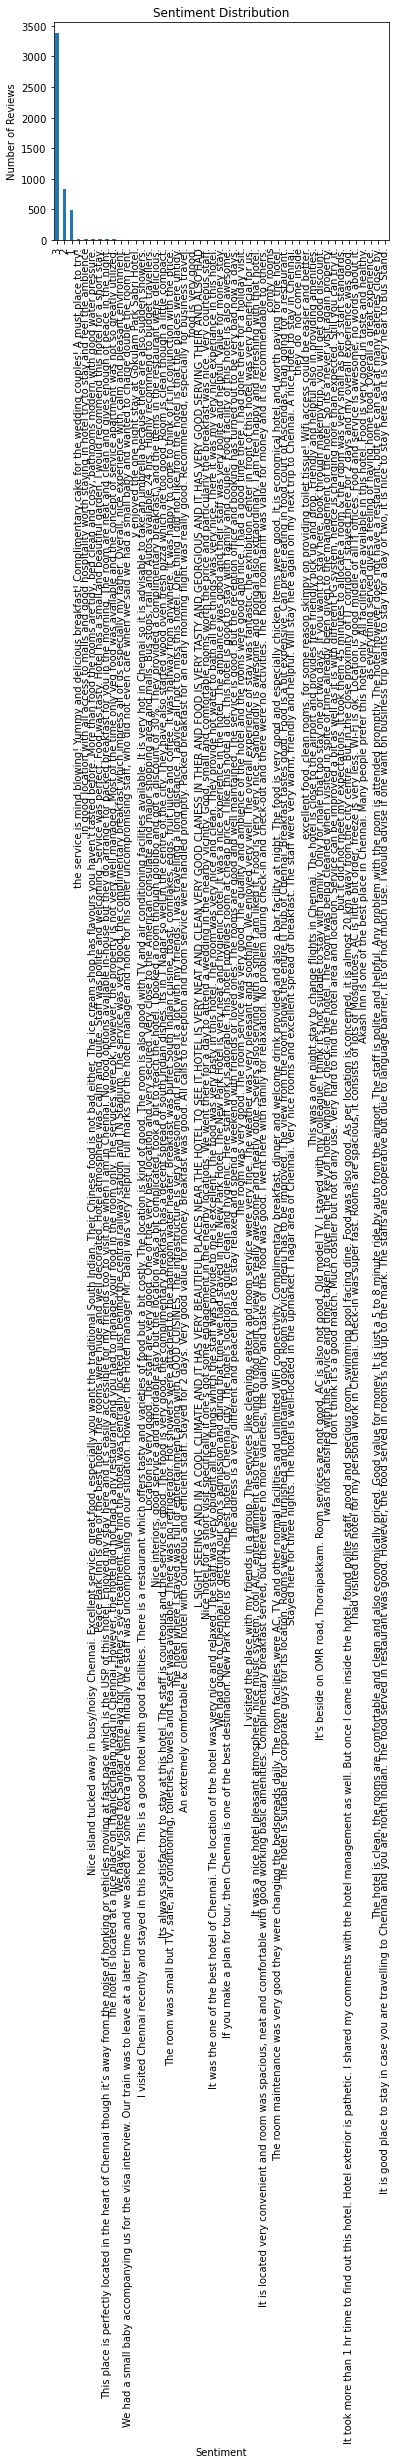

In [103]:
# Plot the sentiment column
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

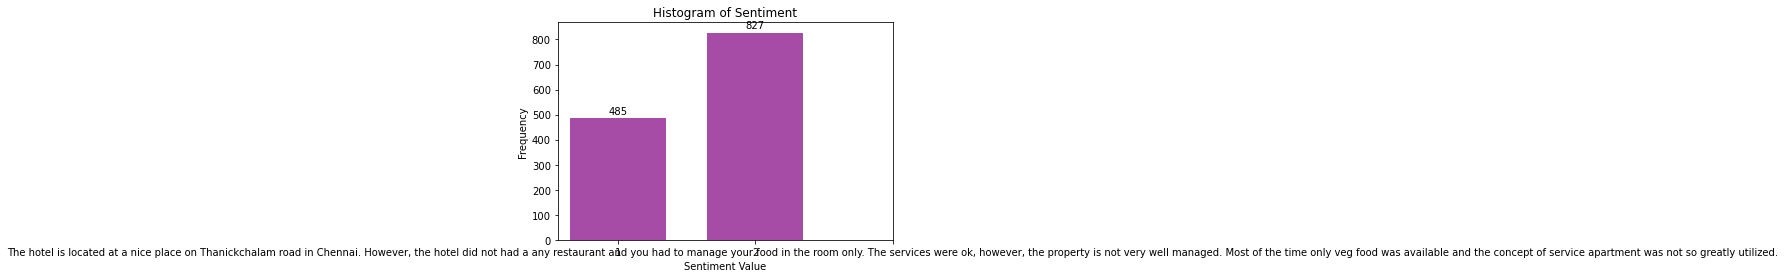

,Sentiment Value,Count
0,they do not come inside,1
1,as everything served gives a feeling of havin...,1
2,but it did not meet my expectations. It took ...,1
3,comfy rooms,1
4,excellent food. clean rooms. for some reason ...,1
5,food is very good.,1
6,in good location with all access to malls and...,4
7,the service is mind blowing! Yummy and delici...,4
8,1,485
9,2,827


In [104]:
# Plot histogram for the Sentiment column
# Calculate the histogram data
values, bins, patches = plt.hist(df['Sentiment'].dropna(), bins=np.arange(0.5, 3, 1), color='purple', alpha=0.7, rwidth=0.7, align='mid')
#plt.figure(figsize=(20, 16))
# Annotate each bar with its height value
for i in range(len(values)):
    plt.text(bins[i] + 0.5, values[i] + 10, str(int(values[i])), ha='center', va='bottom', fontsize=10)

plt.title("Histogram of Sentiment")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3])
plt.grid(False)
plt.show()
# Count rows by value in the Sentiment column
sentiment_counts = df['Sentiment'].value_counts().sort_index()

# Display the counts in a table format
sentiment_counts_table = pd.DataFrame(sentiment_counts).reset_index()
sentiment_counts_table.columns = ["Sentiment Value", "Count"]
sentiment_counts_table



#### Remove all tags and special characters, stop words  from the Dataset   in the ‘Review_Text’ column


In [106]:
# Initialize the list of stop words
stop_words = set(stopwords.words('english'))
# Function to clean the text
def clean_text(text):
    # Remove HTML tags using regular expression
    text = re.sub('<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
# Drop rows where 'Review_Text' is NaN
df = df.dropna(subset=['Review_Text'])
# Apply the clean_text function to the 'Review_Text' column
df['Cleaned_Review_Text'] = df['Review_Text'].apply(clean_text)
# Display the first few rows to show the cleaned 'Review_Text'
df[['Review_Text', 'Cleaned_Review_Text']].head(10)

,Review_Text,Cleaned_Review_Text
0,Its really nice place to stay especially for b...,really nice place stay especially business tou...
1,It seems that hotel does not check the basic a...,seems hotel check basic amenities room handing...
2,Worst hotel I have ever encountered. I will ne...,worst hotel ever encountered never think stay ...
3,Had a good time in this hotel and the staff Ku...,good time hotel staff kumaraishwarya house kee...
4,good hotel and staff Veg food good non veg bre...,good hotel staff veg food good non veg breakfa...
5,Great hotel. The staff if welcoming. Helpful. ...,great hotel staff welcoming helpful always
6,"The hotel is mostly clean, but bathrooms need ...",hotel mostly clean bathrooms need care first b...
7,Awesome hotel with all needed amenities and lu...,awesome hotel needed amenities luxury friendly...
8,Very nice \nComfortable,nice comfortable
9,The staff of the hotel were polite. The brick...,staff hotel polite brick oven chefs extremely ...


#### Display the HMM POS tagging on the first 4 rows of ‘Review_Text’ and display a sparse tree for the same


In [110]:

# Function to display a sparse tree (parse tree) for a sentence
def display_parse_tree(sentence):
    # Tokenize and POS Tag
    tokenized_sentence = word_tokenize(sentence)
    pos_tags = pos_tag(tokenized_sentence)
    
    # Named Entity Recognition (NER) to generate a sparse tree
    parse_tree = ne_chunk(pos_tags)
    
    return parse_tree

# Extract the first 4 rows from the 'Review_Text' column
df['Review_Text']=df['Cleaned_Review_Text']
first_four_reviews = df['Cleaned_Review_Text'].head(4)

# Initialize an empty dictionary to hold the POS tags and parse trees
review_pos_tags = {}
review_parse_trees = {}
# Tokenize and POS tag each review
tagged_reviews = [pos_tag(word_tokenize(review)) for review in first_four_reviews]

# Print the tokens and their POS tags
for tags in tagged_reviews:
    print(tags)
    print("\n")

# Display a tree for each tagged review
for tags in tagged_reviews:
    tree = Tree('S', tags)
    tree.pretty_print()

# # Apply POS tagging and generate parse trees for each of the first 4 reviews
# for i, review in enumerate(first_four_reviews):
#     # Tokenize the words in the review
#     tokens = word_tokenize(review)
    
#     # Get the POS tags
#     pos_tags = pos_tag(tokens)
    
#     # Get the sparse tree (parse tree)
#     parse_tree = display_parse_tree(review)
    
#     # Save the POS tags and parse trees in the dictionary
#     review_pos_tags[f'Review_{i+1}'] = pos_tags
#     review_parse_trees[f'Review_{i+1}'] = parse_tree

# # Display the POS tags for the first 4 reviews
# review_pos_tags


[('really', 'RB'), ('nice', 'JJ'), ('place', 'NN'), ('stay', 'NN'), ('especially', 'RB'), ('business', 'NN'), ('tourist', 'NN'), ('purpose', 'NN')]


[('seems', 'VBZ'), ('hotel', 'NN'), ('check', 'NN'), ('basic', 'JJ'), ('amenities', 'NNS'), ('room', 'NN'), ('handing', 'VBG'), ('room', 'NN'), ('traveller', 'NN'), ('phone', 'NN'), ('room', 'NN'), ('working', 'VBG'), ('created', 'VBN'), ('problem', 'NN'), ('hectic', 'JJ'), ('day', 'NN'), ('travel', 'NN'), ('would', 'MD'), ('like', 'VB'), ('relax', 'JJ'), ('work', 'NN'), ('pace', 'NN'), ('sent', 'VBD'), ('technician', 'JJ'), ('kept', 'NN'), ('looking', 'VBG'), ('fix', 'JJ'), ('hour', 'NN'), ('get', 'NN'), ('room', 'NN'), ('changed', 'VBD')]


[('worst', 'JJS'), ('hotel', 'NN'), ('ever', 'RB'), ('encountered', 'VBD'), ('never', 'RB'), ('think', 'VBP'), ('stay', 'JJ'), ('thiis', 'JJ'), ('hotel', 'NN'), ('future', 'NN')]


[('good', 'JJ'), ('time', 'NN'), ('hotel', 'NN'), ('staff', 'NN'), ('kumaraishwarya', 'NN'), ('house', 'NN'), ('keeping'

#### Parse the first 4 rows of ‘v2’ using Viterbi Parser ( [Use toy_pcfg1 and toy_pcfg2 to get the probabilistic context-free grammars; use the PCFG suitable for each sentence]

In [111]:
sentences = df['Review_Text'].head(4).dropna().tolist()
sentences

['really nice place stay especially business tourist purpose',
 'seems hotel check basic amenities room handing room traveller phone room working created problem hectic day travel would like relax work pace sent technician kept looking fix hour get room changed',
 'worst hotel ever encountered never think stay thiis hotel future',
 'good time hotel staff kumaraishwarya house keeping guy sure name people make stay pleasant happy days sure back place stay chennaigood job guys']

In [112]:
# # Define toy_pcfg1 and toy_pcfg2
toy_pcfg1_str = """
    S -> NP VP [1.0]
    NP -> Det N [0.45] | N [0.25] | 'I' [0.15] | NP PP [0.15]
    VP -> V NP [0.35] | V ADJP [0.3] | V [0.2] | V NP PP [0.15]
    PP -> P NP [0.7] | P [0.3]
    ADJP -> Adj [0.7] | Adv Adj [0.3]
    Det -> 'the' [0.2] | 'this' [0.1] | 'a' [0.2] | 'an' [0.15] | 'my' [0.15] | 'its' [0.1] | 'thiis' [0.1] 
    N -> 'chennaigood' [0.025] | 'kumaraishwarya' [0.025] | 'technician' [0.025] | 'traveller' [0.025] | 'place' [0.05] | 'phone' [0.05] | 'hotel' [0.05] | 'room' [0.05] | 'amenities' [0.05] | 'day' [0.05] | 'problem' [0.05] | 'pace' [0.05] | 'time' [0.05] | 'staff' [0.05] | 'stay' [0.05] | 'business' [0.05] | 'tourist' [0.05] | 'purpose' [0.05] | 'hour' [0.05] | 'never' [0.065] | 'future' [0.065] | 'business' [0.010] | 'tourist' [0.004] | 'purpose' [0.003]|'day' [0.001] | 'hour' [0.001] | 'Worst' [0.001]
    V -> 'changed' [0.025] | 'looking' [0.025] | 'check' [0.025] | 'kept' [0.025] | 'would' [0.05] | 'is' [0.05] | 'seems' [0.05] | 'stay' [0.05] | 'check' [0.05] | 'work' [0.05] | 'have' [0.025] | 'pace' [0.025] | 'had' [0.05] | 'relax' [0.05] | 'like' [0.05] | 'get' [0.05] | 'sent' [0.05] | 'think' [0.05] | 'recommend' [0.05] | 'created' [0.05] | 'need' [0.05] | 'working' [0.05] | 'travel' [0.025] | 'handing' [0.023] | 'ever' [0.001] | 'encountered' [0.001]
    P -> 'to' [0.2] | 'for' [0.1] | 'in' [0.1] | 'of' [0.1] | 'at' [0.1] | 'on' [0.1] |'time' [0.1] | 'pleasant' [0.1] | 'happy' [0.1]
    Adj -> 'worst' [0.1] | 'amenities' [0.05] | 'fix' [0.05] | 'problem' [0.05] | 'basic' [0.05] | 'nice' [0.1] | 'good' [0.1] | 'pleasant' [0.1] | 'happy' [0.2] | 'great' [0.1] | 'hectic' [0.1]
    Adv -> 'really' [0.04] | 'especially' [0.06] | 'very' [0.05] | 'never' [0.05] | 'future' [0.05] | 'Kumaraishwarya' [0.05] | 'house' [0.05] |  'keeping' [0.05] |  'guy' [0.05] |  'sure' [0.05] | 'name' [0.05] | 'people' [0.05] | 'make' [0.05] | 'days' [0.05] | 'sure' [0.05] | 'back' [0.05] | 'chennaiGood' [0.05] | 'job' [0.05] | 'guys' [0.05] | 'tie' [0.05] 
"""

# Define PCFG toy_pcfg2
toy_pcfg2_str = """
    S -> NP VP [1.0]
    NP -> Det N [0.5] | N [0.3] | NP PP [0.2]
    VP -> V NP [0.35] | V ADJP [0.3] | V [0.2] | V NP PP [0.15]
    PP -> P NP [0.8] | P [0.2]
    ADJP -> Adj [0.7] | Adv Adj [0.3]

    Det -> 'the' [0.4] | 'this' [0.15] | 'its' [0.3] | 'thiis' [0.15] 
    N ->  'chennaigood' [0.01] | 'kumaraishwarya' [0.01] |'technician' [0.0279] | 'traveller' [0.0289] | 'place' [0.0389] | 'phone' [0.0389] | 'hotel' [0.122] | 'room' [0.04] | 'staff' [0.122] | 'service' [0.122] | 'stay' [0.0794] | 'Chennai' [0.04] | 'encountered' [0.08] | 'think' [0.07] | 'worst' [0.03] | 'Worst' [0.03] | 'thiis' [0.06] | 'business' [0.01] | 'tourist' [0.01] | 'purpose' [0.01] | 'day' [0.01] | 'hour' [0.01]
    V -> 'changed' [0.025] | 'looking' [0.025] | 'check' [0.025] | 'kept' [0.025] | 'would' [0.05] | 'pace' [0.025] | 'is' [0.05] | 'get' [0.05] | 'was' [0.05] | 'seems' [0.1] | 'stay' [0.05] | 'work' [0.05] | 'have' [0.05] | 'relax' [0.05] | 'enjoy' [0.1] | 'working' [0.05] | 'sent' [0.05] | 'created' [0.05] | 'like' [0.05] | 'travel' [0.05] | 'handing' [0.023] | 'ever' [0.001] | | 'encountered' [0.001]
    P -> 'with' [0.1] | 'for' [0.2] | 'in' [0.2] | 'of' [0.05] | 'at' [0.05] | 'on' [0.1] |'time' [0.1] | 'pleasant' [0.1] | 'happy' [0.1]
    Adj -> 'worst' [0.1] | 'amenities' [0.05] | 'fix' [0.05] | 'problem' [0.05] | 'basic' [0.05] | 'good' [0.1] | 'excellent' [0.2] | 'friendly' [0.1] | 'nice' [0.1] | 'great' [0.1] | 'hectic' [0.1]
    Adv -> 'really' [0.04] | 'especially' [0.06] | 'very' [0.05] | 'never' [0.05] | 'future' [0.05] | 'Kumaraishwarya' [0.05] | 'house' [0.05] |  'keeping' [0.05] |  'guy' [0.05] |  'sure' [0.05] | 'name' [0.05] | 'people' [0.05] | 'make' [0.05] | 'days' [0.05] | 'sure' [0.05] | 'back' [0.05] | 'chennaiGood' [0.05] | 'job' [0.05] | 'guys' [0.05] | 'tie' [0.05] 
"""

# Try creating the grammars again
toy_pcfg1 = nltk.PCFG.fromstring(toy_pcfg1_str)
toy_pcfg2 = nltk.PCFG.fromstring(toy_pcfg2_str)

toy_pcfg1, toy_pcfg2

toy_pcfg1 = nltk.PCFG.fromstring(toy_pcfg1_str)
toy_pcfg2 = nltk.PCFG.fromstring(toy_pcfg2_str)

# # Display the parse trees for the first 4 reviews
# review_parse_trees_pcfg
# Tokenize and parse the sentences
parsed_trees = []

# Extract the first four rows of the 'Review_Text' column

for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    
    # Try parsing with toy_pcfg1
    parser1 = ViterbiParser(toy_pcfg1)
    trees1 = list(parser1.parse(tokens))
    
    # Try parsing with toy_pcfg2
    parser2 = ViterbiParser(toy_pcfg2)
    trees2 = list(parser2.parse(tokens))
    
    if len(trees1) > 0:
        parsed_trees.append(trees1[0])
    elif len(trees2) > 0:
        parsed_trees.append(trees2[0])
    else:
        parsed_trees.append(None)

parsed_trees


[None, None, None, None]

#### Above code Parse the first 4 rows of ‘Review_Text’ using Viterbi Parser , We used toy_pcfg1 and toy_pcfg2 to get the probabilistic context-free grammars. We manually looked at the sentences and tried to get as accurate grammer as possible.

##### There are multiple reasons as below why  toy_pcfg1 and toy_pcfg2  wasn't able to parse tree .

<ol>
<li>
Limited Coverage: Being a "toy" version means they are not comprehensive and only represent a small subset of a language. They might not be able to generate or parse a wide range of sentences beyond their defined rules.
</li>
<li>
Over-simplification: Toy PCFGs might overlook the complexities and intricacies of a natural language, leading to inaccuracies in modeling.
</li>
Not Suitable for Real-world Applications: Due to their simplicity, toy PCFGs are not suitable for real-world natural language processing tasks. They're primarily for educational purposes.
<li>
May Not Capture Ambiguities: Natural languages are filled with ambiguities, and a simplified PCFG might not be equipped to handle or represent these ambiguities.
</li>
<li>
Lack of Probabilistic Fidelity: The probabilities associated with the production rules in toy PCFGs might be arbitrarily assigned or overly simplified, not truly representing the probabilistic nature of real-world language constructs.
</li>
</ol>